# importing the necesary libraries


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# loading the dataset

In [62]:
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# data analysis and exploration

In [63]:
#getting the column names
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [64]:
#getting the shape of the data
data.shape

(7043, 21)

In [65]:
#checking for the empty cells
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [66]:
#checking for duplicates
data.duplicated().sum()

0

In [67]:
#getting the summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [68]:
#getting the  statistical summary of the data
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [69]:
#getting the unique items of the target variable
data["Churn"].unique()



array(['No', 'Yes'], dtype=object)

In [70]:
data["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

# data visualization

In [71]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'churn distribution')

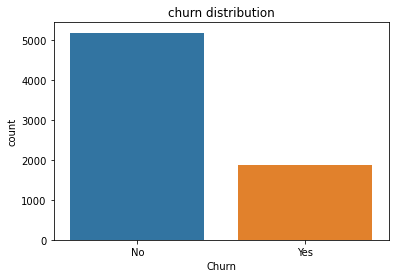

In [72]:
#visualizing the target variable
sns.countplot(data["Churn"])
plt.title("churn distribution")

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

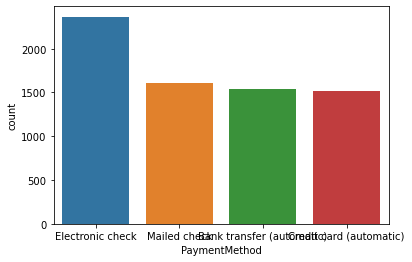

In [73]:
sns.countplot(data["PaymentMethod"])

Text(0.5, 1.0, 'monthly charges distribution')

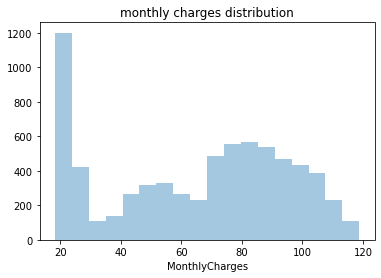

In [74]:
sns.distplot(data["MonthlyCharges"], kde=False)
plt.title("monthly charges distribution")

Text(0.5, 1.0, 'tenure  distribution')

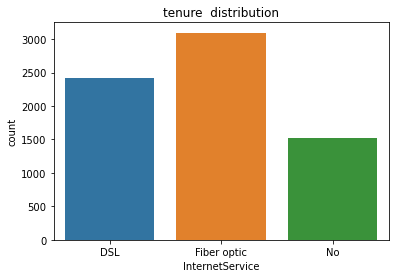

In [75]:
sns.countplot(data["InternetService"])
plt.title("tenure  distribution")

Text(0.5, 1.0, 'PhoneService  distribution')

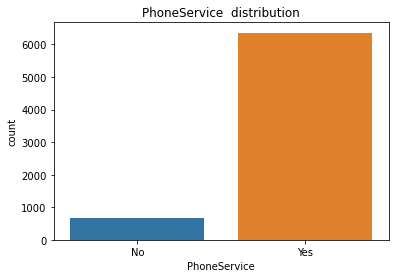

In [76]:
sns.countplot(data["PhoneService"],)
plt.title("PhoneService  distribution")

Text(0.5, 1.0, 'tenure  distribution')

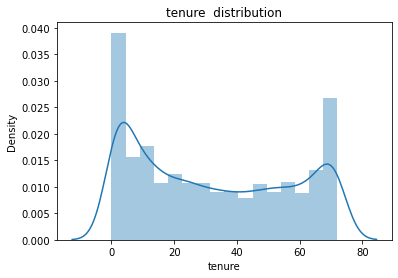

In [77]:
sns.distplot(data["tenure"])
plt.title("tenure  distribution")

Text(0.5, 1.0, 'SeniorCitizen  distribution')

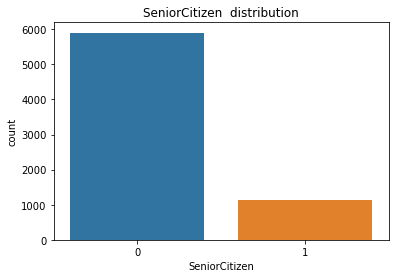

In [78]:
sns.countplot(data["SeniorCitizen"],)
plt.title("SeniorCitizen  distribution")

Text(0.5, 1.0, 'SeniorCitizen  distribution')

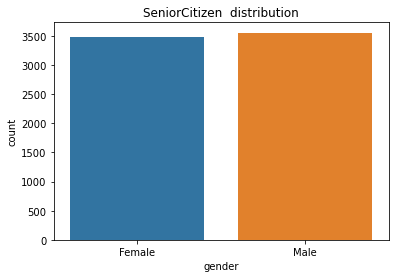

In [79]:
sns.countplot(data["gender"],)
plt.title("SeniorCitizen  distribution")

# data preprocessing

In [80]:
#encoding the categorical variables
lb=LabelEncoder()
data["gender"]=lb.fit_transform(data["gender"])
data["Partner"]=lb.fit_transform(data["Partner"])
data["Dependents"]=lb.fit_transform(data["Dependents"])
data["PhoneService"]=lb.fit_transform(data["PhoneService"])
data["MultipleLines"]=lb.fit_transform(data["MultipleLines"])
data["InternetService"]=lb.fit_transform(data["InternetService"])
data["OnlineSecurity"]=lb.fit_transform(data["OnlineSecurity"])
data["DeviceProtection"]=lb.fit_transform(data["DeviceProtection"])
data["TechSupport"]=lb.fit_transform(data["TechSupport"])
data["StreamingTV"]=lb.fit_transform(data["StreamingTV"])
data["StreamingMovies"]=lb.fit_transform(data["StreamingMovies"])
data["Contract"]=lb.fit_transform(data["Contract"])
data["PaperlessBilling"]=lb.fit_transform(data["PaperlessBilling"])
data["PaymentMethod"]=lb.fit_transform(data["PaymentMethod"])
data["OnlineBackup"]=lb.fit_transform(data["OnlineBackup"])
data["Churn"]=lb.fit_transform(data["Churn"])

In [36]:
data['TotalCharges'] = data['TotalCharges'].str.strip()

In [37]:
data["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [34]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [81]:
#dropping unnecesary columns
data.drop(["customerID","TotalCharges"], axis=1,inplace=True)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


# spliting the data

In [83]:
#splitting the features and the target variable
x=data.drop(["Churn"], axis=1)
y=data["Churn"]

In [84]:
#getting the shape of x and y
print( x.shape)
print(y.shape)

(7043, 18)
(7043,)


In [85]:
#spliting the train and test data
x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=2)

In [86]:
#using the random forest classifier
rf=RandomForestClassifier()

In [87]:
#fittig the model
rf.fit(x_train,y_train)

RandomForestClassifier()

# model evaluation

In [89]:
pred=rf.predict(x_test)

In [91]:
print(accuracy_score(y_test,pred)*100)

79.13413768630234
